# Linear regression #
This notebook gives a short introduction to linear regression using scikit-learn.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

We prepare here a function that later has to be fitted. 

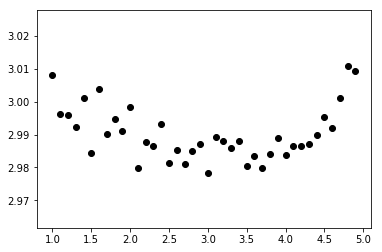

In [2]:
x = np.arange(1,5,0.1)
np.random.seed(1)
y = 3 + 0.008*x - 0.01 * x**2 + 0.002 * x**3 - 0.00005 * x**4 + np.random.normal(0,0.005,len(x))
plt.scatter(x,y,color='black')
plt.show()

We now split the data into training and test set.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
x = x.reshape(-1,1)
y = y.reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)
print("training sample:",x_train.shape)
print("test sample:",x_test.shape)

training sample: (30, 1)
test sample: (10, 1)


Here we perform a linear regression. We only use the x-values as features (plus an intercept). This corresponds to a linear fit.

In [6]:
lr = LinearRegression().fit(x_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[ 2.9926652]
[[-0.00100141]]


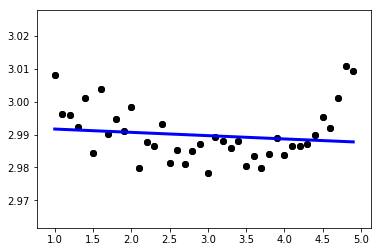

In [7]:
plt.scatter(x,y,color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.show()

Using linear regression, we can also fit a quadratic function! We introduce x^2 as new feature. While the function to be fitted is quadratic, the model is still linear in its features.

In [8]:
X_train = pd.DataFrame(x_train)
X_train[1] = X_train[0]**2
X_train

,0,1
0,3.5,12.25
1,1.9,3.61
2,2.3,5.29
3,4.1,16.81
4,4.4,19.36
5,1.8,3.24
6,2.7,7.29
7,3.4,11.56
8,1.0,1.00
9,4.3,18.49


In [9]:
lr = LinearRegression().fit(X_train, y_train)
print(lr.intercept_)
print(lr.coef_)

[ 3.023385]
[[-0.02651311  0.00443443]]


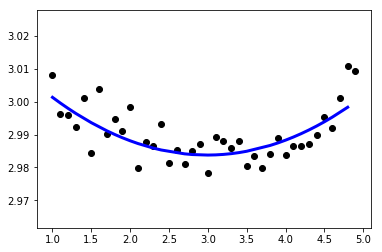

In [10]:
plt.scatter(x,y,color='black')
X_plot = X_train.sort_values(0)
plt.plot(X_plot[0], lr.predict(X_plot), color='blue', linewidth=3)
plt.show()

It is instructional to see how the fit changes when including higher order polynomials as new features. While a purely linear function is underfitting, high-order polynomials are obviously overfitting the data.

In [12]:
def fitorder(n=2,plot=False):
    X = pd.DataFrame(x)
    for k in np.arange(1,n):
        X[int(k)] = X[0]**int(k+1)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
    
    lr = LinearRegression().fit(X_train, y_train)
    
    if plot == True:
        plt.scatter(x_train,y_train,color='blue')
        plt.scatter(x_test,y_test,color='black')
        X_plot = X_train.sort_values(0)
        plt.plot(X_plot[0], lr.predict(X_plot), color='blue', linewidth=3)
        plt.show()
    
    return lr.score(X_train,y_train),lr.score(X_test,y_test)

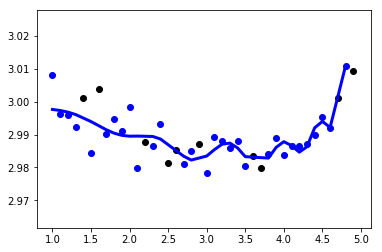

(0.65763560656967424, -2321.9295692112014)

In [13]:
fitorder(25,plot=True)